# **Los homicidios dolosos de mujeres en Argentina**


# Introducción

**Abstract**

La base SAT Homicidios Dolosos 2017-2021 es una base de datos provista por el Ministerio de Seguridad de la Nación,  la cual contiene información estadística sobre los homicidios dolosos de todo el territorio de la República Argentina en los años 2017, 2018, 2019, 2020 y 2021. Más específicamente, la información está desagregada a partir de distintas variables que permiten conocer ciertas características sobre los hechos, las víctimas y victimarios/as. Dicha información permite identificar características y tendencias generales del delito de homicidio doloso.
Específicamente, en el presente proyecto nos enfocamos en los Homicidios Dolosos de Mujeres para analizar sus características y tendencias centrales.
Particularmente, resulta de interés la variable "Tipo de hecho según víctima" la cual permite distinguir los Femicidios de los otros homicidios dolosos de mujeres, sin razones de género. Esta variable es resultado de un proceso clasificatorio realizado a partir de determinadas características de los hechos que permiten identificar razones de género en la comisión del hecho.
En el presente proyecto buscamos analizar las características distintivas de los femicidios y las especificidades que distinguen a estos hechos de otro tipo de homicidios dolosos de mujeres. Además, utilizaremos la variable "Tipo de homicidio" a modo de variable objetivo de modo de construir un modelo que permita ayudar al proceso clasificatorio mencionado.

**Contexto empresarial**


El femicidio se ha construido como un problema público de relevancia en Argentina en los últimos años por lo cual resulta fundamental desarrollar estadísticas que permitan conocer la magnitud del problema y distinguir, dentro del universo de homicidios dolosos de mujeres, los femicidios de otro tipo de homicidios, es decir, de los hechos que no están motivados por razones de género. La producción de datos en esta línea resulta fundamental para conocer la magnitud del problema y sus características, así como también para elaborar políticas públicas que puedan contribuir a prevenir y erradicar este tipo de violencias extremas contra las mujeres.

**Objetivo**

El objetivo fundamental del presente trabajo consiste desarrollar un modelo predictivo que permita clasificar los homicidios dolosos de mujeres distinguiendo los femicidios de aquellos homicidios sin razones de género.

Dicho modelo abonará a facilitar y mejorar la calidad de la construcción de estadística sobre femicidios, la cual resulta fundamental para el diseño de políticas de prevención de estos crímenes.

**Aclaraciones metodológicas**


La variable principal que permite distinguir a los homicidios dolosos de varones de los homicidios dolosos de mujeres y a su vez subdividir a estos últimos en "Femicidios" y "Otros" es "Tipo de hecho según víctima". Es importante tener en cuenta que esta variable clasifica a los hechos (y no a las víctimas). Todos los hechos en los que hay por lo menos una víctima mujer quedan clasficados como homicidios dolosos de mujeres (Femicidios u Otros), incluso aquellos que también incluyen víctimas varones. Es por eso que el análisis de los homicidios dolosos de mujeres incluye víctimas varones.

El dataset elegido se encontraba estructurado a partir de filas que contenían tanto información sobre los hechos, como las víctimas y los inculpados de los homicidios dolosos. Para la implementación del modelo fue necesario reestructurarlo para hacer que cada fila corresponda a un solo hecho de homicidio y contenga información respecto de las victimas y victimarios. Es decir, la reestructuración permitió que cada registro corresponda a un solo hecho de homicidio, clasificado a partir de la variable objetivo (tipo de hecho según víctima). En el apartado "Feature engineering: reestrcuturación del dataset" se presentan las distintas transformaciones realizadas.




# Importación de librerías y del dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
!pip install mlxtend
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [ ]:
pd.options.display.max_columns = None

Importación del dataset base SAT Homicidios Dolosos 2017-2021 y presentación de sus principales características.

In [ ]:
url = "https://drive.google.com/uc?id=1SLSCK9hAbLqfpgSg8vrTHwTfH0qyTvBP&export=download&authuser=0"
df0 = pd.read_excel(url)

In [ ]:
df = df0.copy()

In [ ]:
df.head(5)

,Id_hecho,federal,Cod_INDEC_Prov,provincia,codigo_departamento,Cod_INDEC,departamento,localidad,codigo_localidad,radio_censal,latitud_radio,longitud_radio,anio,mes,tipo_lugar,otro_tipo_lugar,tipo_lugar_ampliado,clase_arma,otro_clase_arma,en_ocasion_otro_delito,otro_en_ocasion_otro_delito,motivo_origen_registro,otro_motivo_origen_registro,fecha_hecho,hora_hecho,tipo_persona_id,tipo_persona,sexo_victima,identidad_genero_victima,otro_identidad_genero_victima,tr_edad_victima,clase_victima,otro_clase_victima,situacion_ocupacional_victima,otro_situacion_ocupacional_victi,sexo_inculpado,identidad_genero_inculpado,otro_identidad_genero_inculpado,tr_edad_inculpado,clase_inculpado,otro_clase_inculpado,relacion_inculpado_victima,relacion_victima_inculpado,tipo_hecho_segun_victima,cant_inc,cant_vic
0,11535,No,58,NEUQUEN,35,58035,Confluencia,Plottier,100,NaN,NaN,NaN,2017,1,Domicilio particular,NaN,Domicilio particular,Arma de fuego,NaN,Sí Robo,NaN,Intervención policial,NaN,2017-01-14,22:38:00,Imputado idRegistro 12929,Imputado,No corresponde,No corresponde,-----------,No corresponde,No corresponde,-------,No corresponde,---------,Masculino,Varón,NaN,Sin determinar,Sin determinación,NaN,Sin relación,No corresponde,HD Varón,3,1
1,11535,No,58,NEUQUEN,35,58035,Confluencia,Plottier,100,NaN,NaN,NaN,2017,1,Domicilio particular,NaN,Domicilio particular,Arma de fuego,NaN,Sí Robo,NaN,Intervención policial,NaN,2017-01-14,22:38:00,Imputado idRegistro 12930,Imputado,No corresponde,No corresponde,-----------,No corresponde,No corresponde,-------,No corresponde,---------,Masculino,Varón,NaN,Sin determinar,Sin determinación,NaN,Sin relación,No corresponde,HD Varón,3,1
2,11535,No,58,NEUQUEN,35,58035,Confluencia,Plottier,100,NaN,NaN,NaN,2017,1,Domicilio particular,NaN,Domicilio particular,Arma de fuego,NaN,Sí Robo,NaN,Intervención policial,NaN,2017-01-14,22:38:00,Imputado idRegistro 12931,Imputado,No corresponde,No corresponde,-----------,No corresponde,No corresponde,-------,No corresponde,---------,Masculino,Varón,NaN,Sin determinar,Sin determinación,NaN,Sin relación,No corresponde,HD Varón,3,1
3,11535,No,58,NEUQUEN,35,58035,Confluencia,Plottier,100,NaN,NaN,NaN,2017,1,Domicilio particular,NaN,Domicilio particular,Arma de fuego,NaN,Sí Robo,NaN,Intervención policial,NaN,2017-01-14,22:38:00,Víctima idRegistro 12235,Víctima,Masculino,Varón,NaN,45-49,Civil,NaN,Empleado de otros sectores,NaN,No corresponde,No corresponde,-------,No corresponde,No corresponde,----,No corresponde,Sin relación,HD Varón,3,1
4,11536,No,58,NEUQUEN,35,58035,Confluencia,Cutral Có,40,NaN,NaN,NaN,2017,1,Vía pública,NaN,Vía pública,Arma de fuego,NaN,No fue en ocasión de otro delito,NaN,Intervención policial,NaN,2017-01-07,10:35:00,Imputado idRegistro 12932,Imputado,No corresponde,No corresponde,-----------,No corresponde,No corresponde,-------,No corresponde,---------,Masculino,Varón,NaN,30-34,Civil,NaN,Sin relación,No corresponde,HD Varón,2,1


In [ ]:
df.shape

(25160, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Id_hecho                          25160 non-null  int64         
 1   federal                           25160 non-null  object        
 2   Cod_INDEC_Prov                    25160 non-null  int64         
 3   provincia                         25160 non-null  object        
 4   codigo_departamento               25160 non-null  int64         
 5   Cod_INDEC                         25160 non-null  int64         
 6   departamento                      25160 non-null  object        
 7   localidad                         25160 non-null  object        
 8   codigo_localidad                  25160 non-null  object        
 9   radio_censal                      13990 non-null  float64       
 10  latitud_radio                     13990 non-nu

#Data Cleaning

## Transformaciones básicas: reagrupación y eliminación de variables

A continuación realizamos una serie de transformaciones básicas que facilitarán manipular el dataset y realizar el análisis. En primer lugar, se realiza el reagrupamiento de distintas variables y sus categorías. Luego, se eliminan las variables que son de interés para el presente trabajo. Estas transformaciones se han realizado en base a conocimiento experto sobre el tema y están orientadas a facilitar el análisis de los datos.

In [ ]:
#Reagrupamo los valores de la variable "Tipo de hecho" dintinguiendo a los Femicidios de otro tipo de homicidios dolosos
df.tipo_hecho_segun_victima = df.tipo_hecho_segun_victima.replace({'HD Mujer Cis Trans Travesti-Femicidio':'Femicidio',
                                                                   'HD Mujer Cis Trans Travesti-Otro homicidio':'Otro',
                                                                   'HD Varón':'HD Varón',
                                                                   'HD Mujer Cis Trans Travesti-Posible femicidio':'Otro',
                                                                   'HD Mujer Cis Trans Travesti-Femicidio vinculado':'Femicidio',
                                                                   'HD Varón-Femicidio vinculado':'HD Varón',
                                                                   'HD Sin determinar':'Sin determinar',
                                                                   'HD Mujer Cis Trans Travesti-Posible femicidio vinculado':'Otro',
                                                                   'HD Varón Trans':'HD Varón'})

In [ ]:
df.value_counts('tipo_hecho_segun_victima')

tipo_hecho_segun_victima
HD Varón          20947
Femicidio          2485
Otro               1716
Sin determinar       12
dtype: int64

In [ ]:
#Realizamos una reagrupación de la variable "Identidad de género", de modo de distinguir a los varones de las mujeres.
#Esto implicó agrupar a las mujeres cis y trans en una misma categoría y hacer lo mismo con los varones cis y trans.
df.identidad_genero_victima = df.identidad_genero_victima.replace({'Varón trans':'Varón', 'Mujer trans/travesti':'Mujer'})

In [ ]:
df.value_counts('identidad_genero_victima')

identidad_genero_victima
No corresponde    13646
Varón              9604
Mujer              1904
Sin determinar        6
dtype: int64

In [ ]:
#Reagrupamos la variable "Relación víctima-inculpado" para simplificar la cantidad de categorías.
df.relacion_victima_inculpado = df.relacion_victima_inculpado.replace({'Conyuge/ pareja':'Pareja o Ex Pareja',
                                                                       'Ex conyuge / ex pareja':'Pareja o Ex Pareja',
                                                                       'Otros vínculos familiares':'Familiar',
                                                                       'Hijo/a':'Familiar',
                                                                       'Hermano/a':'Familiar',
                                                                       'Padre/Madre':'Familiar',
                                                                       'Empleador': 'Otras rel. no familiares',
                                                                       'Cliente / proveedor': 'Otras rel. no familiares',
                                                                       'Socio (Relación comercial)': 'Otras rel. no familiares',
                                                                       'Empleado': 'Otras rel. no familiares',
                                                                       'Otras relaciones no familiares':'Otras rel. no familiares'})

In [ ]:
df.value_counts('relacion_victima_inculpado')

relacion_victima_inculpado
No corresponde              13646
Sin determinación            4656
Sin relación                 2904
Otras rel. no familiares     1947
Pareja o Ex Pareja           1062
Familiar                      945
dtype: int64

In [ ]:
#Reagrupamos la variable "Clase de arma" dada la existencia de algunas categorías con valores muy bajos.
df.clase_arma = df.clase_arma.replace({'Arrollamiento por rodado o tren':'Otra',
                                       'Precipitación al vacío':'Otra',
                                       'Envenenamiento':'Otra',
                                       'Otra arma o mecanismo':'Otra'})

In [ ]:
df.value_counts('clase_arma')

clase_arma
Arma de fuego             12655
Arma blanca                7201
Objeto contundente         1511
Sin determinación          1394
Golpes                     1030
Ahorcamiento / asfixia      672
Quemaduras                  404
Otra                        293
dtype: int64

In [ ]:
# Eliminamos las columnas que no son de interés
df = df.drop(['federal', 'Cod_INDEC_Prov', 'codigo_departamento', 'Cod_INDEC', 'localidad', 'codigo_localidad',
              'radio_censal', 'latitud_radio', 'longitud_radio', 'otro_tipo_lugar', 'tipo_lugar_ampliado', 'otro_clase_arma',
              'otro_en_ocasion_otro_delito', 'motivo_origen_registro', 'otro_motivo_origen_registro', 'sexo_victima',
              'otro_identidad_genero_victima', 'clase_victima', 'otro_clase_victima', 'situacion_ocupacional_victima',
              'otro_situacion_ocupacional_victi','sexo_inculpado', 'otro_identidad_genero_inculpado', 'clase_inculpado',
              'otro_clase_inculpado'], axis=1)

## Tratamiento de nulos y duplicados

Comprobamos que no haya registros dulpicados, ni nulos.

In [ ]:
len(df) - len(df.drop_duplicates()) #Comprobamos que no haya filas duplicadas

0

In [ ]:
df.isnull().sum() #Comprobamos que no haya valores nulos

Id_hecho                      0
provincia                     0
departamento                  0
anio                          0
mes                           0
tipo_lugar                    0
clase_arma                    0
en_ocasion_otro_delito        0
fecha_hecho                   0
hora_hecho                    0
tipo_persona_id               0
tipo_persona                  0
identidad_genero_victima      0
tr_edad_victima               0
identidad_genero_inculpado    0
tr_edad_inculpado             0
relacion_inculpado_victima    0
relacion_victima_inculpado    0
tipo_hecho_segun_victima      0
cant_inc                      0
cant_vic                      0
dtype: int64

#EDA (Análisis Exploratorio de Datos)

## Los homicidios dolosos en Argentina según género de la víctima

Tal como se muestra en el siguiente gráfico, la mayoría de las víctimas de homicidios dolosos son varones.

In [ ]:
# Filtramos para quedarnos solo con las víctimas y evitar los datos con información "No corresponde"
victimas = df.query("tipo_persona == 'Víctima'")

In [ ]:
temp_df = victimas.groupby(['identidad_genero_victima']).count()['Id_hecho'].sort_values(ascending=False)
temp_df = pd.DataFrame(temp_df).reset_index()
label1 = temp_df['identidad_genero_victima'].value_counts().head(5).index

# Datos
data = [
    go.Pie(
        labels=label1,
        values=temp_df['Id_hecho'],
        marker=dict(colors=sns.color_palette('pastel')),
        hoverinfo='value',
        textinfo='label+percent'
    )
]

# Diseño
layout = go.Layout(
    title='Cantidad de víctimas de homicidios según género. Argentina (2017-2021)',
    title_font=dict(size=16, color='black'),
    margin=dict(l=10, r=10, t=40, b=10),
    legend=dict(orientation="v", yanchor="bottom", y=0.62),
)

fig = go.Figure(data=data, layout=layout)
fig.show()

A partir del siguiente gráfico es posible observar la distribución de varones y mujeres a lo largo de los años analizados. La cantidad de víctimas varones oscila entre 1780 y 2038, mientras que la cantidad de víctimas mujeres por año va de 313 a 411. En ambos casos, las frecuencias más bajas se registran en 2021.

In [ ]:
import plotly.graph_objects as go

temp_df = victimas.groupby(['anio', 'identidad_genero_victima']).count()['Id_hecho'].sort_values(ascending=False)
temp_df = pd.DataFrame(temp_df).reset_index()
temp_df = temp_df.rename({'anio':'Año', 'Id_hecho': 'Cantidad de víctimas',
                          'identidad_genero_victima': 'Género de las víctimas'}, axis=1)

# Crear el gráfico
fig = go.Figure()

for generovic in temp_df['Género de las víctimas'].unique():
    data = temp_df[temp_df['Género de las víctimas'] == generovic]
    fig.add_trace(go.Bar(
        x=data['Año'],
        y=data['Cantidad de víctimas'],
        name=generovic
    ))

# Diseño
fig.update_layout(
    title='Cantidad de víctimas de homicidios según género y año. Argentina (2017-2021)',
    xaxis_title='',
    yaxis_title='',
    barmode='stack',  # Para apilar las barras
    legend=dict(orientation='v', yanchor='bottom', y=1, xanchor='right', x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)


fig.show()

## Los homicidios dolosos de mujeres

A continuación se presenta un análisis en profundidad de los homicidios dolosos de mujeres. Para eso filtramos todos aquellos homicidios que tengan aunque sea una víctima mujer, ya sea que hayan sido asesinadas por razones de género o no.
En términos prácticos, eso implica quedarnos solo con los casos de "Femicidios" y "Otros" de la columna de tipo de hecho, excluyendo todos los "HD Varon" y los "Sin determinar", es decir, casos en los que no se ha podido determinar el género de la víctima.
Del total de homicidios dolosos en los que al menos hay una víctima mujer (1848), 1148 corresponden a "Femicidios" y 700 corresponden a "Otro".

Es importante mencionar que la cantidad difiere a la del gráfico anterior ya que se contabilizan solo los hechos (y no las víctimas).


In [ ]:
HDM = victimas[(victimas['tipo_hecho_segun_victima'] == 'Femicidio') | (victimas['tipo_hecho_segun_victima'] == 'Otro')]
temp_df = HDM.groupby(['tipo_hecho_segun_victima']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df = pd.DataFrame(temp_df).reset_index()
label1 = temp_df['tipo_hecho_segun_victima'].value_counts().head(5).index

# Datos
data = [
    go.Pie(
        labels=label1,
        values=temp_df['Id_hecho'],
        marker=dict(colors=sns.color_palette('pastel')),
        hoverinfo='value',
        textinfo='label+percent'
    )
]

# Diseño
layout = go.Layout(
    title='Cantidad de homicidios dolosos dolosos de mujeres según tipo de homicidio. Argentina (2017-2021)',
    title_font=dict(size=16, color='black'),
    margin=dict(l=10, r=10, t=40, b=10),
    legend=dict(orientation="v", yanchor="bottom", y=0.82),
)

fig = go.Figure(data=data, layout=layout)
fig.show()

En el siguiente gráfico se presenta la cantidad de de homicidios dolosos de mujeres según tipo de hecho y distinguiendo por años. Es posible observar que las proporciones se mantienen a lo largo de la serie. Además, en 2021 se registra una disminución, tanto en "Femicidios", como "Otros".

In [ ]:
HDM = victimas[(victimas['tipo_hecho_segun_victima'] == 'Femicidio') | (victimas['tipo_hecho_segun_victima'] == 'Otro')]
temp_df = HDM.groupby(['anio', 'tipo_hecho_segun_victima']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df = pd.DataFrame(temp_df).reset_index()
temp_df = temp_df.rename({'anio':'Año', 'Id_hecho': 'Cantidad de víctimas', 'tipo_hecho_segun_victima': 'Tipo de hecho'}, axis=1)

fig = go.Figure()

for tipo in temp_df['Tipo de hecho'].unique():
    data = temp_df[temp_df['Tipo de hecho'] == tipo]
    fig.add_trace(go.Bar(
        x=data['Año'],
        y=data['Cantidad de víctimas'],
        name=tipo
    ))

fig.update_layout(
    title='Cantidad de homicidios de mujeres según tipo de hecho y año. Argentina (2017-2021)',
    xaxis_title='',
    yaxis_title='',
    barmode='stack', # Barras apiladas
    legend=dict(orientation='v', yanchor='bottom', y=1.02, xanchor='right', x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)


fig.show()

### Género de las víctimas

En lo que sigue vamos a segmentar el análisis por género de modo de distinguir los homicidios en los que solo hay víctimas mujeres de aquellos que combinan víctimas varones y mujeres.

Tal como muestra la primer figura, en el caso de los hechos que solo tienen víctimas mujeres, el 64,4% (1122) son Femicidios y el 35,6% (621) son "Otro".

Por otro lado, en el caso de los homicidios con víctimas de ambos géneros, el 75,2% (79 hechos) son "Otro" y el 24,8% (26 hechos) son Femicidios.

In [ ]:
# Datos para el primer gráfico
mujeres = victimas.groupby('Id_hecho').filter(lambda x: ('Mujer' in x['identidad_genero_victima'].values) and not
 ('Varón' in x['identidad_genero_victima'].values))
temp_df_mujeres = mujeres.groupby(['tipo_hecho_segun_victima']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df_mujeres = pd.DataFrame(temp_df_mujeres).reset_index()
label1_mujeres = temp_df_mujeres['tipo_hecho_segun_victima'].value_counts().head(5).index

# Datos para el segundo gráfico
Mixto = victimas.groupby('Id_hecho').filter(lambda x: ('Mujer' in x['identidad_genero_victima'].values) and
 ('Varón' in x['identidad_genero_victima'].values))
temp_df_mixto = Mixto.groupby(['tipo_hecho_segun_victima']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df_mixto = pd.DataFrame(temp_df_mixto).reset_index()
label1_mixto = temp_df_mixto['tipo_hecho_segun_victima'].value_counts().head(5).index

# Crear la figura
fig = go.Figure()

# Agregar el primer gráfico
fig.add_trace(go.Pie(labels=label1_mujeres,
                     values=temp_df_mujeres['Id_hecho'],
                     marker=dict(colors=sns.color_palette('pastel')),
                     hoverinfo='value',
                     textinfo='label+percent',
                     domain={'x': [0, 0.5], 'y': [0, 1]}))

# Agregar el segundo gráfico
fig.add_trace(go.Pie(labels=label1_mixto,
                     values=temp_df_mixto['Id_hecho'],
                     marker=dict(colors=sns.color_palette('pastel')),
                     hoverinfo='value',
                     textinfo='label+percent',
                     domain={'x': [0.5, 1], 'y': [0, 1]}))

# Diseño de la figura
fig.update_layout(
    title='Comparación entre homicidios con víctimas mujeres y con víctimas mixtas, según tipo de hecho. Argentina (2017-2021)',
    annotations=[
        {'text': 'Mujeres', 'x': 0.25, 'y': 1.1, 'showarrow': False, 'font': {'size': 16}},
        {'text': 'Mixto', 'x': 0.75, 'y': 1.1, 'showarrow': False, 'font': {'size': 16}}
    ],
    height=400
)

fig.show()

### Vínculo entre las víctimas y los inculpados

Para analizar el vínculo de la víctima con el inclupado, fue necesario establecer prioridades, dado que las diferentes víctimas correspondientes a un mismo hecho podían tener diferentes vínculos con el o los víctimarios. Es por ello, que establecimos jerarquías en el vínculo entre víctimas y victimarios, de modo de conservar solo el vínculo más jerárquico. Esto implicó considerar en primer lugar los vínculos de "Pareja" o "Ex-Pareja", luego los vínculos "Familiares", después "Otras relaciónes no familiares", luego "Sin relación" y, finalmente, "Sin determinar".


A partir de los datos, es posible notar grandes diferencias en el tipo de vínculo de la víctima con el/los inculpados en función del tipo de homicidio. Dicho de otro modo, en los femicidios la gran mayoría de las víctimas eran pareja o ex pareja de los inculpados y, en segundo lugar, tenían otro tipo de vínculo familiar. Por el contrario, en los otros homicidios dolosos de mujeres las categoría más frecuentes son "sin determinar" y "sin relación".

In [ ]:
def vinculo_prioritario(group): #creamos una función para agrupar los vínculos
    if 'Pareja o Ex Pareja' in group['relacion_victima_inculpado'].values:
        return group[group['relacion_victima_inculpado'] == 'Pareja o Ex Pareja']
    elif 'Familiar' in group['relacion_victima_inculpado'].values and 'Conyuge/Pareja' not in group['relacion_victima_inculpado'].values:
        return group[group['relacion_victima_inculpado'] == 'Familiar']
    elif 'Otras rel. no familiares' in group['relacion_victima_inculpado'].values and 'Otros vinculos familiares' not in group['relacion_victima_inculpado'].values:
        return group[group['relacion_victima_inculpado'] == 'Otras rel. no familiares']
    elif 'Sin relación' in group['relacion_victima_inculpado'].values and 'Otros vinculos familiares' not in group['relacion_victima_inculpado'].values:
        return group[group['relacion_victima_inculpado'] == 'Sin relación']
    else:
        return group[group['relacion_victima_inculpado'] == 'Sin determinación']

df_vinculo = HDM.groupby('Id_hecho').apply(vinculo_prioritario)

In [ ]:
temp_df = df_vinculo.groupby(['relacion_victima_inculpado', 'tipo_hecho_segun_victima']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df = pd.DataFrame(temp_df).reset_index()
temp_df = temp_df.rename({'tipo_hecho_segun_victima': 'Tipo de hecho', 'Id_hecho': 'Cantidad de hechos',
                          'relacion_victima_inculpado':'Vínculo'}, axis=1)

fig = go.Figure()

for vinculo in temp_df['Vínculo'].unique():
    data = temp_df[temp_df['Vínculo'] == vinculo]
    fig.add_trace(go.Bar(
        x=data['Tipo de hecho'],
        y=data['Cantidad de hechos'],
        name=vinculo
    ))

fig.update_layout(
    title='Homicidios dolosos de mujeres según tipo de hecho y vínculo. Argentina (2017-2021)',
    xaxis_title='',
    yaxis_title='',
    barmode='group', # Barras apiladas
    legend=dict(orientation='v', yanchor='bottom', y=0.72, xanchor='right', x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)


fig.show()

Por otro lado, presentamos esta misma información en dos gráficos de tortas con sus respectivos porcentajes. El primer gráfico corresponde a los Femicidios. Es posible observar que alrededor del 85% de los casos corresponden a hechos producidos "Pareja o Ex pareja" o "Familiar".

Por su parte, el segundo gráfico corresponde a "Otros". En el 45% de los casos no es posible determinar el vínculo y en el 24% no hay relación entre víctima e imputado.

In [ ]:
# Datos para el primer gráfico: Femicidios
femicidios = df_vinculo[df_vinculo['tipo_hecho_segun_victima'] == 'Femicidio']
temp_df_femicidios = femicidios.groupby(['relacion_victima_inculpado']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df_femicidios = pd.DataFrame(temp_df_femicidios).reset_index()
label1_femicidios = temp_df_femicidios['relacion_victima_inculpado'].value_counts().head(5).index

# Datos para el segundo gráfico: Otros
otros = df_vinculo[df_vinculo['tipo_hecho_segun_victima'] == 'Otro']
temp_df_otros= otros.groupby(['relacion_victima_inculpado']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df_otros= pd.DataFrame(temp_df_otros).reset_index()
label1_otros = temp_df_otros['relacion_victima_inculpado'].value_counts().head(5).index

# Crear la figura
fig = go.Figure()

# Agregar el primer gráfico
fig.add_trace(go.Pie(labels=label1_femicidios,
                     values=temp_df_femicidios['Id_hecho'],
                     marker=dict(colors=sns.color_palette('pastel')),
                     hoverinfo='value',
                     textinfo='label+percent',
                     domain={'x': [0, 0.5], 'y': [0, 1]}))

# Agregar el segundo gráfico
fig.add_trace(go.Pie(labels=label1_otros,
                     values=temp_df_otros['Id_hecho'],
                     marker=dict(colors=sns.color_palette('pastel')),
                     hoverinfo='value',
                     textinfo='label+percent',
                     domain={'x': [0.5, 1], 'y': [0, 1]}))

# Diseño de la figura
fig.update_layout(
    title='Comparación entre femicidios y otro tipo de homicidios, según tipo de vínculo entre la víctima y el victimario. Argentina (2017-2021)',
    annotations=[
        {'text': 'Femicidios', 'x': 0.25, 'y': 1.1, 'showarrow': False, 'font': {'size': 16}},
        {'text': 'Otros', 'x': 0.75, 'y': 1.1, 'showarrow': False, 'font': {'size': 16}}
    ],
    height=400,
    legend=dict(orientation='v', yanchor='bottom', y=0.52, xanchor='right',  x=1.2),
    margin=dict(l=50, r=50, t=80, b=0.5)
)

fig.show()

### Armas utilizadas

Por otro lado, es posible observar que en los hechos que no son Femicidios ("Otro") el arma de fuego es el mecanismo más frecuente para causar la muerte, mientras que en el caso de los "Femicidios" es más frecuente el arma blanca y además tienen mayor peso relativo otros tipos de armas como "ahorcamiento", "objeto contundente", "golpes" y "quemaduras".

In [ ]:
HDM = victimas[(victimas['tipo_hecho_segun_victima'] == 'Femicidio') | (victimas['tipo_hecho_segun_victima'] == 'Otro')]
temp_df = HDM.groupby(['clase_arma', 'tipo_hecho_segun_victima']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df = pd.DataFrame(temp_df).reset_index()
temp_df = temp_df.rename({'tipo_hecho_segun_victima': 'Tipo de hecho', 'Id_hecho': 'Cantidad de hechos', 'clase_arma':'Arma'}, axis=1)

fig = go.Figure()

for arma in temp_df['Arma'].unique():
    data = temp_df[temp_df['Arma'] == arma]
    fig.add_trace(go.Bar(
        x=data['Tipo de hecho'],
        y=data['Cantidad de hechos'],
        name=arma
    ))

fig.update_layout(
    title='Homicidios dolosos de mujeres según tipo de hecho y arma utilizada. Argentina (2017-2021)',
    xaxis_title='',
    yaxis_title='',
    barmode='group', # Barras separadas
    legend=dict(orientation='v', yanchor='bottom', y=0.52, xanchor='right',  x=0.98),
    margin=dict(l=50, r=50, t=80, b=0.5)
)


fig.show()

### Lugar del hecho

Por otro lado, también es posible observar que la mayoría de los Femicidios suceden en el Domicilio Particular. En el caso de los otros homicidios, si bien domicilio particular continúa siendo la categoría más frecuente, la categoría de Vía Pública ocupa un lugar significativo.

In [ ]:
HDM = victimas[(victimas['tipo_hecho_segun_victima'] == 'Femicidio') | (victimas['tipo_hecho_segun_victima'] == 'Otro')]
temp_df = HDM.groupby(['tipo_lugar', 'tipo_hecho_segun_victima']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df = pd.DataFrame(temp_df).reset_index()
temp_df = temp_df.rename({'tipo_hecho_segun_victima': 'Tipo de hecho', 'Id_hecho': 'Cantidad de hechos',
                          'tipo_lugar':'Lugar del hecho'}, axis=1)

fig = go.Figure()

for lugar in temp_df['Lugar del hecho'].unique():
    data = temp_df[temp_df['Lugar del hecho'] == lugar]
    fig.add_trace(go.Bar(
        x=data['Tipo de hecho'],
        y=data['Cantidad de hechos'],
        name=lugar
    ))

fig.update_layout(
    title='Homicidios dolosos de mujeres según tipo de hecho y lugar. Argentina (2017-2021)',
    xaxis_title='',
    yaxis_title='',
    barmode='group', # Barras separadas
    legend=dict(orientation='v', yanchor='bottom', y=0.52, xanchor='right', x=0.98),
    margin=dict(l=50, r=50, t=80, b=0.5)
)


fig.show()

Tal como se observa en el primer gráfico, en el caso de los "Femicidios" un 63,8% ocurren en "Domicilio Particular" y 17,7% en "Vía Pública".

Por otro lado, en el caso de "Otros homicidios" la cantidad de hechos en "Domicilio Particular" es relativamente menor (49,2%), mientras que aumenta la participación de la categoría de "Vía Pública" (36,7%).

In [ ]:
# Datos para el primer gráfico: Femicidios
temp_df_femicidios = femicidios.groupby(['tipo_lugar']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df_femicidios = pd.DataFrame(temp_df_femicidios).reset_index()
label1_femicidios = temp_df_femicidios['tipo_lugar'].value_counts().head(5).index

# Datos para el segundo gráfico: Otros
temp_df_otros= otros.groupby(['tipo_lugar']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df_otros= pd.DataFrame(temp_df_otros).reset_index()
label1_otros = temp_df_otros['tipo_lugar'].value_counts().head(5).index

# Crear la figura
fig = go.Figure()

# Agregar el primer gráfico
fig.add_trace(go.Pie(labels=label1_femicidios,
                     values=temp_df_femicidios['Id_hecho'],
                     marker=dict(colors=sns.color_palette('pastel')),
                     hoverinfo='value',
                     textinfo='label+percent',
                     domain={'x': [0, 0.5], 'y': [0, 1]}))

# Agregar el segundo gráfico
fig.add_trace(go.Pie(labels=label1_otros,
                     values=temp_df_otros['Id_hecho'],
                     marker=dict(colors=sns.color_palette('pastel')),
                     hoverinfo='value',
                     textinfo='label+percent',
                     domain={'x': [0.5, 1], 'y': [0, 1]}))

# Diseño de la figura
fig.update_layout(
    title='Comparación entre femicidios y otro tipo de homicidios, según tipo de lugar del hecho. Argentina (2017-2021)',
    annotations=[
        {'text': 'Femicidios', 'x': 0.25, 'y': 1.1, 'showarrow': False, 'font': {'size': 16}},
        {'text': 'Otros', 'x': 0.75, 'y': 1.1, 'showarrow': False, 'font': {'size': 16}}
    ],
    height=400,
    legend=dict(orientation='v', yanchor='bottom', y=0.52, xanchor='right', x=1.1),
    margin=dict(l=50, r=20, t=80, b=20)
)

fig.show()

### Concurrencia con otro delito

Por otro lado, tal como se muestra en el gráfico, la mayoría de los casos de concurrencia del homicidio con abuso sexual son "Femicidios". Por el contrario, la gran mayoría de los hechos en concurrencia con robo, consisten en "Otro".

In [ ]:
HDM = victimas[(victimas['tipo_hecho_segun_victima'] == 'Femicidio') | (victimas['tipo_hecho_segun_victima'] == 'Otro')]
temp_df = HDM.groupby(['en_ocasion_otro_delito', 'tipo_hecho_segun_victima']).nunique()['Id_hecho'].sort_values(ascending=False)
temp_df = pd.DataFrame(temp_df).reset_index()
temp_df = temp_df.rename({'tipo_hecho_segun_victima': 'Tipo de hecho', 'Id_hecho': 'Cantidad de hechos',
                          'en_ocasion_otro_delito':'Concurrencia con otro delito'}, axis=1)

fig = go.Figure()

for delito in temp_df['Concurrencia con otro delito'].unique():
    data = temp_df[temp_df['Concurrencia con otro delito'] == delito]
    fig.add_trace(go.Bar(
        x=data['Tipo de hecho'],
        y=data['Cantidad de hechos'],
        name=delito
    ))

fig.update_layout(
    title='Homicidios dolosos de mujeres según tipo de hecho y concurrencia con otro delito. Argentina (2017-2021)',
    xaxis_title='',
    yaxis_title='',
    barmode='group', # Barras separadas
    legend=dict(orientation='v', yanchor='bottom', y=0.62, xanchor='right', x=0.98),
    margin=dict(l=50, r=100, t=80, b=50)
)


fig.show()

### Características de los/as imputados/as

A su vez, los imputados por "Femicidios" son generalmente varones y en segundo lugar, casos en los que no se ha podido determinar el género. A su vez, la mayoría de los casos con imputada mujer son otro tipo de homicidios.

Es posible pensar que los casos en que hay imputadas mujeres en casos de femicidios seguramente se debe a que su participación en el hecho se da en conjunto con inculpados varones.

In [ ]:
# Filtramos para quedarnos solo con los/as imputados/as y evitar los datos con información "No corresponde"
imputados = df.query("tipo_persona == 'Imputado'")

In [ ]:
imputados_HDM = imputados[(imputados['tipo_hecho_segun_victima'] == 'Femicidio') | (imputados['tipo_hecho_segun_victima'] == 'Otro')]
temp_df = imputados_HDM.groupby(['identidad_genero_inculpado', 'tipo_hecho_segun_victima']).count()['Id_hecho'].sort_values(ascending=False)
temp_df = pd.DataFrame(temp_df).reset_index()
temp_df = temp_df.rename({'tipo_hecho_segun_victima': 'Tipo de hecho', 'Id_hecho': 'Cantidad de inculpados',
                          'identidad_genero_inculpado':'Género de los/as inculpados/as'}, axis=1)

fig = go.Figure()

for genero in temp_df['Género de los/as inculpados/as'].unique():
    data = temp_df[temp_df['Género de los/as inculpados/as'] == genero]
    fig.add_trace(go.Bar(
        x=data['Tipo de hecho'],
        y=data['Cantidad de inculpados'],
        name=genero
    ))

fig.update_layout(
    title='Homicidios dolosos de mujeres según tipo de hecho y género de los/as imputados/as. Argentina (2017-2021)',
    xaxis_title='',
    yaxis_title='',
    barmode='group', # Barras separadas
    legend=dict(orientation='v', yanchor='bottom', y=0.62, xanchor='right', x=0.98),
    margin=dict(l=50, r=100, t=80, b=50)
)


fig.show()

# Insights

A partir del análisis exploratorio de los datos presentados es posible extraer una serie de hallazgos:

**Temporalidad**: En los últimos años se han reducido los homicidios dolosos de mujeres, pero en menor medida lo han hecho los femicidios. En términos relativos, los femicidios han aumentado su particpación dentro del total de homicidios dolosos de mujeres.

**Género de la víctima**: Alrededor del 65% de los homicidios dolosos con víctimas mujeres son femicidios, mientras que solo una parte (23%) de los hechos que tienen múltiples víctimas incluyendo ámbos géneros (es decir, "Mixto") constituyen Femicidios.

**Género de los imputados**: En los casos de Femicidios los imputados suelen ser varones o casos en los que no se ha podido determinar el genero. Obviamente, no hay femicidios donde la/s imputada/s sean solo mujeres, sino que esos casos corresponden a "Otros". Solo en algunos pocos casos los femicidios fueron cometidos por imputados con género "Mixto", es decir, que incluyen tanto varones como mujeres.

**Vínculo entre victima y victimario**: La inmensa mayoría de los femicidios son cometidos por las parejas o ex-parejas de las víctimas y en segundo lugar, personas con las que la víctima tenía otro tipo de vínculo familiar. En el caso de los otros homicidios de mujeres, las categorías más frecuentes son los vínculos sin determinar y los casos en los que no había relación.

**Tipo de arma**: En el caso de los "Otros" homicidios hay mayor participación de Armas de Fuego, mientras que en los "Femicidios" tienen mayor peso relativo otras armas, como "Arma Blanca", "Quemaduras", "Golpes" y "Ahorcamiento/asfixia".

**Lugar del hecho:** Si bien tanto en los femicidios como en los otros homicidios de mujeres la categoría más frecuente es "Domicilio Particular", en el caso de los "Otros" homicidios hay mayor participación relativa de la categoría de "Vía pública".

**Concurrencia con otro delito**: Si bien la mayoría de los homicidios dolosos de mujeres (tanto femicidios como otros) no son en concurrencia con otro delito, es posible observar que la mayoría de los casos de concurrencia del homicidio con abuso sexual son "femicidios", mientras que la gran mayoría de los hechos en concurrencia con robo, consisten en "Otro".


#Modelos predictivos para la clasificación de los femicidios

## Feature engineering: reestrcuturación del dataset (de largo a ancho)

El dataset elegido se encontraba estructurado a partir de filas que contenían tanto infromación sobre los hechos, como las víctimas y los inculpados de los homicidios dolosos. Para facilitar el trabajo del modelo fue necesario reestructurarlo para hacer que cada fila corresponda a un solo hecho de homicidio y contenga información respecto de las victimas y victimarios. Es decir, la reestructuración permitió que cada registro corresponda a un solo hecho de homicidio, clasificado a partir de la variable objetivo (tipo de hecho según víctima).

A continución se presentan las distintas transformaciones que fue necesario realizar. En primer lugar, fue necesario identificar los casos en los que en un mismo hecho había víctimas con distinto género. En segundo lugar, recategorizamos la variable de identidad de género de la víctima de modo que si en un mismo hecho había tanto víctimas varones como mujeres, la identidad se registre como "Mixto".

In [ ]:
df_vic = df.query("tipo_persona == 'Víctima'") # Filtramos por las victimas

In [ ]:
df_vic.value_counts('identidad_genero_victima')

identidad_genero_victima
Varón             9604
Mujer             1904
Sin determinar       6
dtype: int64

In [ ]:
df0= df_vic[['Id_hecho', 'identidad_genero_victima']].groupby(['Id_hecho', 'identidad_genero_victima']).nunique().reset_index()

In [ ]:
duplicated_ids = [] # Creamos una lista vacía para almacenar los IDs duplicados

df1 = df0.copy()
# Iteramos sobre los valores de la columna 'Id_hecho' y verificamos si el ID actual está en la lista de IDs duplicados.
# Si el ID está duplicado, actualizamos el valor de 'identidad_genero_victima' a 'Mixto'
# Si el ID no está duplicado, mantenemos el valor original de 'identidad_genero_victima'
for id in df1['Id_hecho']:
  if id in duplicated_ids:
    df1.loc[df1['Id_hecho']==id, ['identidad_genero_victima']] = 'Mixto'
  else:
    df1.loc[df1['Id_hecho']==id, ['identidad_genero_victima']] = df1[df1['Id_hecho']==id]['identidad_genero_victima']

# Agregamos el ID a la lista de IDs duplicados
  duplicated_ids.append(id)
# Reinicializar la lista de IDs duplicados como una lista vacía
duplicated_ids = []

In [ ]:
df2 = df1.copy()[['Id_hecho', 'identidad_genero_victima']].drop_duplicates()
df2

,Id_hecho,identidad_genero_victima
0,11535,Varón
1,11536,Varón
2,11537,Varón
3,11538,Varón
4,11539,Varón
...,...,...
11210,28124,Varón
11211,28125,Varón
11212,28129,Varón
11213,28253,Varón


Por otro lado, establecimos jerarquías en lo que respecta a la variable del vínculo entre víctimas y victimarios, de modo de conservar solo el vínculo más jerárquico. Esto implicó considerar en primer lugar los vínculos de "Pareja" o "Ex-Pareja", luego los vínculos "Familiares", después "Otras relaciónes no familiares", luego "Sin relación" y, finalmente, "Sin determinar".

In [ ]:
df3= df_vic[['Id_hecho', 'relacion_victima_inculpado']].groupby(['Id_hecho', 'relacion_victima_inculpado']).nunique().reset_index()

In [ ]:
duplicated_ids = []

df4 = df3.copy()


for id in df4 ['Id_hecho']:
  if id not in duplicated_ids:
    if 'Pareja o Ex Pareja' in df4[df4['Id_hecho']==id]['relacion_victima_inculpado'].to_list():
      df4.loc[df4['Id_hecho']==id, ['relacion_victima_inculpado']] = 'Pareja o Ex Pareja'
    elif 'Familiar' in df4[df4['Id_hecho']==id]['relacion_victima_inculpado'].to_list() and 'Conyuge/Pareja' not in df4[df4['Id_hecho']==id]['relacion_victima_inculpado'].to_list():
      df4.loc[df4['Id_hecho']==id, ['relacion_victima_inculpado']] = 'Familiar'
    elif 'Otras rel. no familiares' in df4[df4['Id_hecho']==id]['relacion_victima_inculpado'].to_list() and 'Otros vinculos familiares' not in df4[df4['Id_hecho']==id]['relacion_victima_inculpado'].to_list():
      df4.loc[df4['Id_hecho']==id, ['relacion_victima_inculpado']] = 'Otras rel. no familiares'
    elif 'Sin relación' in df4[df4['Id_hecho']==id]['relacion_victima_inculpado'].to_list() and 'Otros vinculos familiares' not in df4[df4['Id_hecho']==id]['relacion_victima_inculpado'].to_list():
      df4.loc[df4['Id_hecho']==id, ['relacion_victima_inculpado']] = 'Sin relación'
    else:
      df4.loc[df4['Id_hecho']==id, ['relacion_victima_inculpado']] = 'Sin determinación'

    duplicated_ids.append(id)

df5 = df4.copy()[['Id_hecho', 'relacion_victima_inculpado']].drop_duplicates()
df5

,Id_hecho,relacion_victima_inculpado
0,11535,Sin relación
1,11536,Sin relación
2,11537,Sin relación
3,11538,Familiar
4,11539,Sin relación
...,...,...
11157,28124,Otras rel. no familiares
11158,28125,Sin relación
11159,28129,Otras rel. no familiares
11160,28253,Pareja o Ex Pareja


In [ ]:
df6 = pd.merge(df2, df5, on='Id_hecho')
df6.head(2)

,Id_hecho,identidad_genero_victima,relacion_victima_inculpado
0,11535,Varón,Sin relación
1,11536,Varón,Sin relación


A continuación realizamos pasos similares para recategorizar la variable de identidad de género del inculpado, considerando como Mixto los casos en que hay imputados de ambos géneros.

In [ ]:
#filtramos por los imputados
df_inc = df.query("tipo_persona == 'Imputado'")

In [ ]:
df7= df_inc[['Id_hecho', 'identidad_genero_inculpado']].groupby(['Id_hecho', 'identidad_genero_inculpado']).nunique().reset_index()

In [ ]:
df8 = df7.copy()

# Creamos una lista vacía para almacenar los IDs
passed_ids = []

# Iteramos sobre los valores de la columna 'Id_hecho' y verificamos si el ID está en la lista
# Si el ID está duplicado, actualizamos el valor de 'identidad_genero_inculpado' a 'Mixto'
# Si el ID no está duplicado, mantenemos el valor original de 'identidad_genero_inculpado'
for id in df8['Id_hecho']:
  if id not in passed_ids:
    if df8[df8['Id_hecho']==id]['identidad_genero_inculpado'].value_counts().index.size>1:
      df8.loc[df8['Id_hecho']==id, ['identidad_genero_inculpado']] = 'Mixto'
    else:
      df8.loc[df8['Id_hecho']==id, ['identidad_genero_inculpado']] = df8[df8['Id_hecho']==id]['identidad_genero_inculpado']

# Agregamos el ID a la lista
  passed_ids.append(id)

# Eliminamos duplicados
df8 = df8.drop_duplicates()
df8

,Id_hecho,identidad_genero_inculpado
0,11535,Varón
1,11536,Varón
2,11537,Varón
3,11538,Varón
4,11539,Varón
...,...,...
11353,28124,Varón
11354,28125,Varón
11355,28129,Varón
11356,28253,Mujer


In [ ]:
# Realizamos la union de los dos df (el de víctimas y el de inculpados)
df9 = pd.merge(df6, df8, on='Id_hecho')
df9

,Id_hecho,identidad_genero_victima,relacion_victima_inculpado,identidad_genero_inculpado
0,11535,Varón,Sin relación,Varón
1,11536,Varón,Sin relación,Varón
2,11537,Varón,Sin relación,Varón
3,11538,Varón,Familiar,Varón
4,11539,Varón,Sin relación,Varón
...,...,...,...,...
11107,28124,Varón,Otras rel. no familiares,Varón
11108,28125,Varón,Sin relación,Varón
11109,28129,Varón,Otras rel. no familiares,Varón
11110,28253,Varón,Pareja o Ex Pareja,Mujer


A continuación se realiza la unión del dataset con nuevas de interés, chequeando paso a paso que no queden hechos duplicados (en algunos casos se presenta para un mismo hecho valores distintos en la variable, por eso vamos realizando las uniones paso a paso y chequeando que quede 1 solo registro para cada fila).

In [ ]:
# En primer lugar agregamos la variable "tipo de lugar".
df10= df[['Id_hecho', 'tipo_lugar']].groupby(['Id_hecho', 'tipo_lugar']).nunique().reset_index()

In [ ]:
# Comprobamos que no haya duplicados
duplicated1 = df10['Id_hecho'].value_counts()[df10['Id_hecho'].value_counts()>1]
duplicated1.head(5)

Series([], Name: Id_hecho, dtype: int64)

In [ ]:
# Unimos la variable al df
df10 = pd.merge(df9, df10, on='Id_hecho')

En segundo lugar, agregamos la variable de clase de arma. En muy pocos casos el dataset contiene en un mismo hecho diferentes tipos de arma (debido probablemente a errores en el dataset, dos o más víctimas del mismo hecho quedaron registradas con distinto tipo de arma), por lo cual identificamos esos duplicados y eliminamos el tipo de arma menos relevante para este trabajo.

In [ ]:
# Primero creamos un df con id_hecho y sus armas correspondientes
df11= df[['Id_hecho', 'clase_arma']].groupby(['Id_hecho', 'clase_arma']).nunique().reset_index()

In [ ]:
# Revisamos si hay duplicados
duplicated2 = df11['Id_hecho'].value_counts()[df11['Id_hecho'].value_counts()>1]
duplicated2.head(5)

13043    2
17853    2
Name: Id_hecho, dtype: int64

In [ ]:
#Localizamos los duplicados
df11.loc[df11['Id_hecho']==13043]

,Id_hecho,clase_arma
1039,13043,Otra
1040,13043,Sin determinación


In [ ]:
#Eliminamos el duplicado en el registro 1040 ya que probablemente se debe a un error
df11.drop([1040], axis=0, inplace=True)

In [ ]:
df11.loc[df11['Id_hecho']==17853]

,Id_hecho,clase_arma
4064,17853,Arma blanca
4065,17853,Objeto contundente


In [ ]:
df11.drop([4065], axis=0, inplace=True) # eliminamos uno de los registros para quedarnos solo con un tipo de arma

In [ ]:
# Y unimos la variable a nuestro dataset
df12 = pd.merge(df10, df11, on='Id_hecho')

Agregamos al dataset la variable target "tipo de hecho".

In [ ]:
df13= df[['Id_hecho', 'tipo_hecho_segun_victima']].groupby(['Id_hecho', 'tipo_hecho_segun_victima']).nunique().reset_index()

Identificamos los duplicados y eliminamos uno de los registros en cada caso ya que los mismos probablemente se deben a errores en el dataset. En este caso se optó por considerar ambos casos como "otro" dadas las otras variables involucradas en el registro.

In [ ]:
# Revisamos si hay duplicados
duplicated3 = df13['Id_hecho'].value_counts()[df13['Id_hecho'].value_counts()>1]
duplicated3

19135    2
25882    2
Name: Id_hecho, dtype: int64

In [ ]:
# Localizamos los duplciados
df13.loc[df13['Id_hecho']==19135]

,Id_hecho,tipo_hecho_segun_victima
5058,19135,Femicidio
5059,19135,Otro


In [ ]:
#Eliminamos los duplicados ya que probablemente se deben a errores (la variable tipo de hechos clasifica hechos y no victimas)
df13.drop([5058], axis=0, inplace=True)

In [ ]:
df13.loc[df13['Id_hecho']==25882]

,Id_hecho,tipo_hecho_segun_victima
9928,25882,Femicidio
9929,25882,Otro


In [ ]:
df13.drop([9928], axis=0, inplace=True)

Realizamos la unión de la variable "tipo de hecho según víctima" con el resto del dataset y luego agregamos las columnas cantidad de víctimas y cantidad de inculpados.

In [ ]:
# Agregamos la variable "tipo de hecho según víctima" al resto del dataset
df14 = pd.merge(df12, df13, on='Id_hecho')

In [ ]:
# Agregamos las variables "cant_vict" y "cant_inc" al resto del dataset
df15= df[['Id_hecho', 'cant_vic', 'cant_inc']].groupby(['Id_hecho', 'cant_vic', 'cant_inc']).nunique().reset_index()

In [ ]:
df16 = pd.merge(df14, df15, on='Id_hecho')

In [ ]:
# Verificamos que no queden duplicados
duplicated4 = df16['Id_hecho'].value_counts()[df16['Id_hecho'].value_counts()>1]
duplicated4

Series([], Name: Id_hecho, dtype: int64)

Finalmente, incorporamos las variables "fecha del hecho", "provincia", "departamento" y "en ocasión de otro delito" y chequeamos que no haya duplicados (es decir, un mismo hecho con 2 valores distintos en las variables).

In [ ]:
# Agregamos nuevas variables de interés
df17= df[['Id_hecho', 'provincia', 'departamento', 'fecha_hecho', 'anio', 'mes',
          'en_ocasion_otro_delito']].groupby(['Id_hecho', 'provincia', 'departamento', 'fecha_hecho', 'anio', 'mes',
                                              'en_ocasion_otro_delito']).nunique().reset_index()

In [ ]:
duplicated5 = df17['Id_hecho'].value_counts()[df17['Id_hecho'].value_counts()>1]
duplicated5

Series([], Name: Id_hecho, dtype: int64)

In [ ]:
df18 = pd.merge(df16, df17, on='Id_hecho')

Finalmente, reorganizamos las columnas y dejamos el dataset listo para utilizar en el modelo.

In [ ]:
df18.head(2)

,Id_hecho,identidad_genero_victima,relacion_victima_inculpado,identidad_genero_inculpado,tipo_lugar,clase_arma,tipo_hecho_segun_victima,cant_vic,cant_inc,provincia,departamento,fecha_hecho,anio,mes,en_ocasion_otro_delito
0,11535,Varón,Sin relación,Varón,Domicilio particular,Arma de fuego,HD Varón,1,3,NEUQUEN,Confluencia,2017-01-14,2017,1,Sí Robo
1,11536,Varón,Sin relación,Varón,Vía pública,Arma de fuego,HD Varón,1,2,NEUQUEN,Confluencia,2017-01-07,2017,1,No fue en ocasión de otro delito


In [ ]:
df19 = df18.reindex(columns=['Id_hecho', 'provincia', 'departamento',	'fecha_hecho', 'anio', 'mes',	'tipo_lugar', 'clase_arma',
                             'relacion_victima_inculpado', 'en_ocasion_otro_delito',	'cant_vic', 'identidad_genero_victima',
                             'cant_inc', 'identidad_genero_inculpado', 'tipo_hecho_segun_victima'])

In [ ]:
df19.head(4)

,Id_hecho,provincia,departamento,fecha_hecho,anio,mes,tipo_lugar,clase_arma,relacion_victima_inculpado,en_ocasion_otro_delito,cant_vic,identidad_genero_victima,cant_inc,identidad_genero_inculpado,tipo_hecho_segun_victima
0,11535,NEUQUEN,Confluencia,2017-01-14,2017,1,Domicilio particular,Arma de fuego,Sin relación,Sí Robo,1,Varón,3,Varón,HD Varón
1,11536,NEUQUEN,Confluencia,2017-01-07,2017,1,Vía pública,Arma de fuego,Sin relación,No fue en ocasión de otro delito,1,Varón,2,Varón,HD Varón
2,11537,NEUQUEN,Confluencia,2017-01-07,2017,1,Vía pública,Arma de fuego,Sin relación,No fue en ocasión de otro delito,1,Varón,1,Varón,HD Varón
3,11538,NEUQUEN,Pehuenches,2017-01-02,2017,1,Domicilio particular,Ahorcamiento / asfixia,Familiar,No fue en ocasión de otro delito,1,Varón,1,Varón,HD Varón


A partir de la variable "tipo de hecho según víctima" es posible distinguir los femicidios de los otros homicidios dolosos de mujeres, sin razones de género. Esta variable es resultado de un proceso clasificatorio realizado a partir de determinadas características de los hechos que permiten identificar razones de género.
A partir de esta variable realizamos un filtro en el dataset para conservar solo los homicidios dolosos dolosos de mujeres, ya sean "Femicidios" u "Otros". Estas categorías incluyen a todos aquellos hechos en los que hay al menos hubo 1 víctima mujer: es decir, los casos en los que la identidad de género de la víctima es "Mujer" o "Mixto". De este modo, el análisis permitirá centrarnos en los homicidios dolosos de mujeres y distinguir entre los femicidios de aquellos que no lo son. En lo que sigue nos proponemos construir un modelo predictivo que constribuya a ayudar y facilitar el proceso clasificatorio mencionado.

La decisión de no trabajar con el dataset entero se debe a que la gran mayoría de los homicidios son homicidios dolosos de varones, obviamente no son femicidios y eso desbalancea los datos.

In [ ]:
df19['tipo_hecho_segun_victima'].value_counts()

HD Varón          9260
Femicidio         1146
Otro               700
Sin determinar       6
Name: tipo_hecho_segun_victima, dtype: int64

In [ ]:
# Hacemos un filtro para quedarnos con los homicidios dolosos de mujeres, ya sean "Femicidios" u "Otros"
nuevo_df = df19.loc [ (df19["tipo_hecho_segun_victima"]=='Femicidio') | (df19["tipo_hecho_segun_victima"]=='Otro') ]
nuevo_df['tipo_hecho_segun_victima'].value_counts()

Femicidio    1146
Otro          700
Name: tipo_hecho_segun_victima, dtype: int64

In [ ]:
nuevo_df.to_excel('nuevo_df.xlsx', sheet_name='sheet1', index=False)

## Una mirada general a de los homicidios dolosos de mujeres (dataframe reestructurado)

A continuación se presenta un análisis de las distintas variables del dataset reestructurado, lo cual brinda una mirada general sobre distintas características de interés de los homicidios dolosos de mujeres. Particularmente, se explora el lugar donde suceden los hechos, el tipo de arma utilizada, género de las víctimas y victimarios, relaciones entre los protagonistas de estos hechos, entre otras variables de interés.

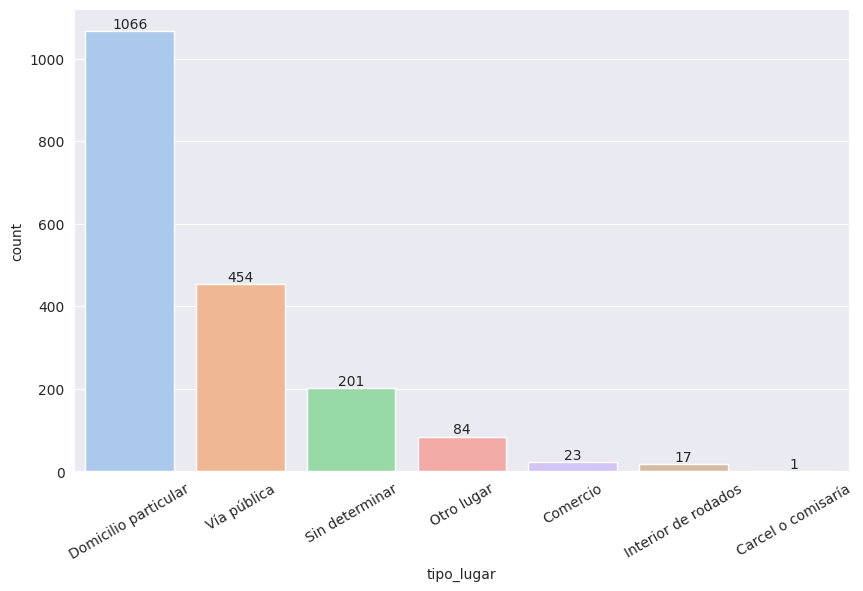

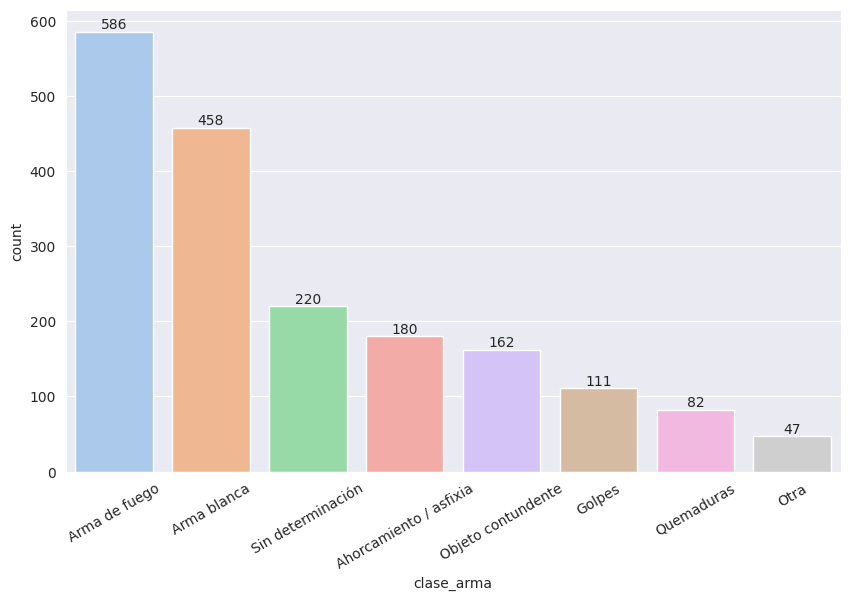

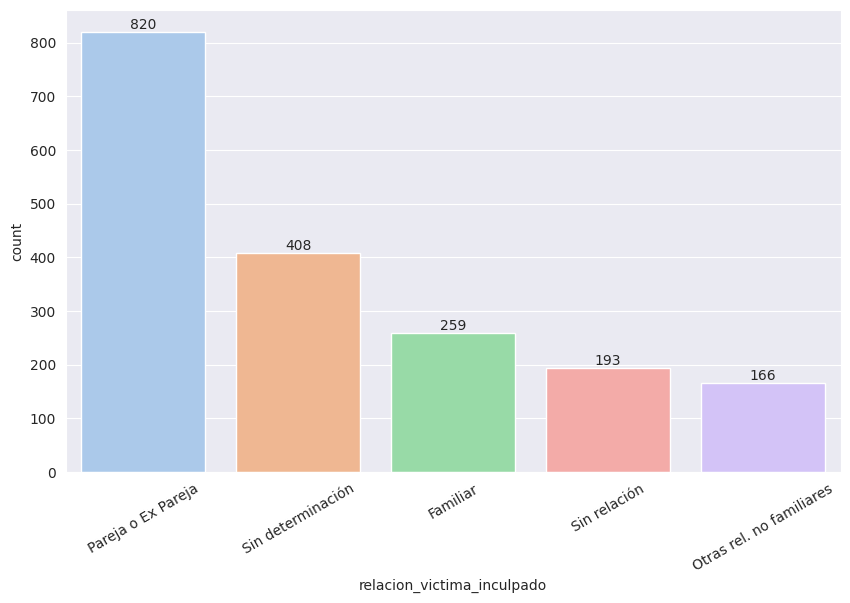

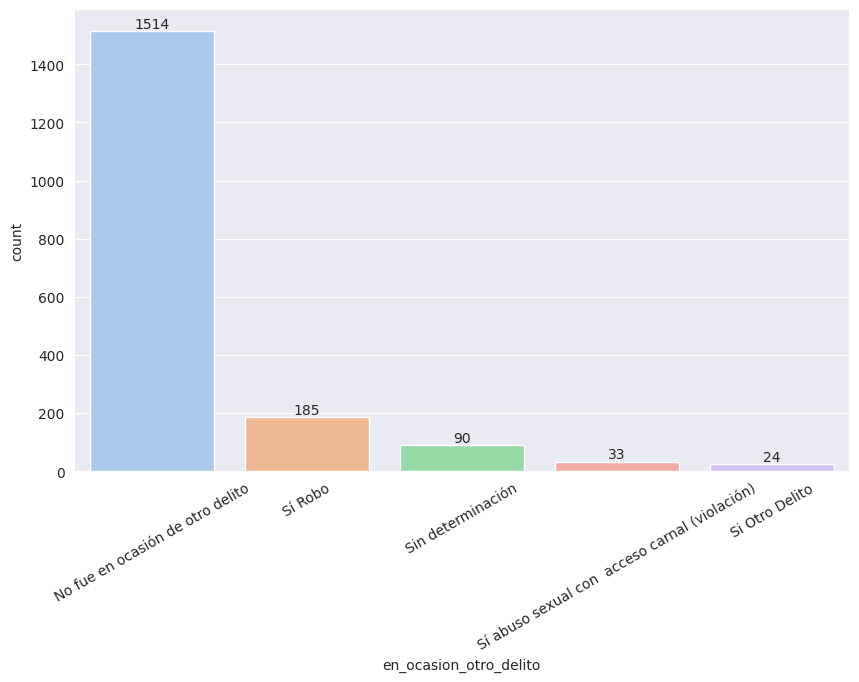

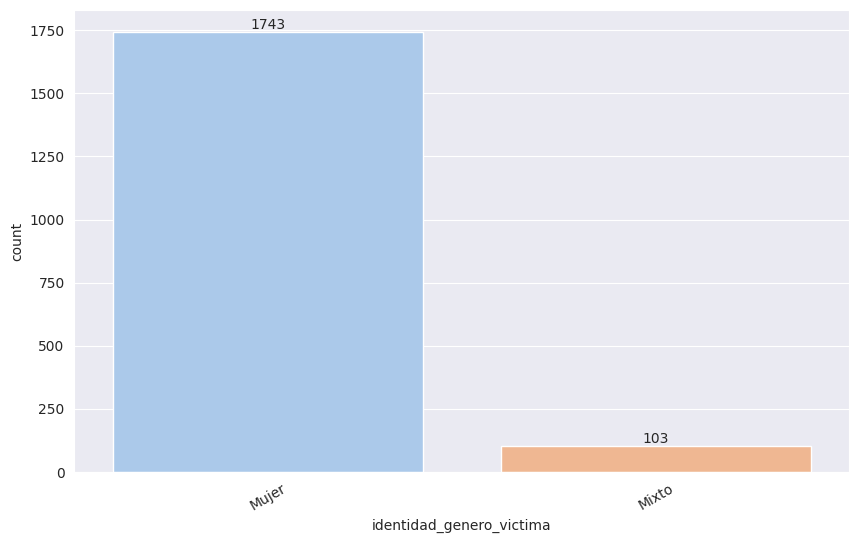

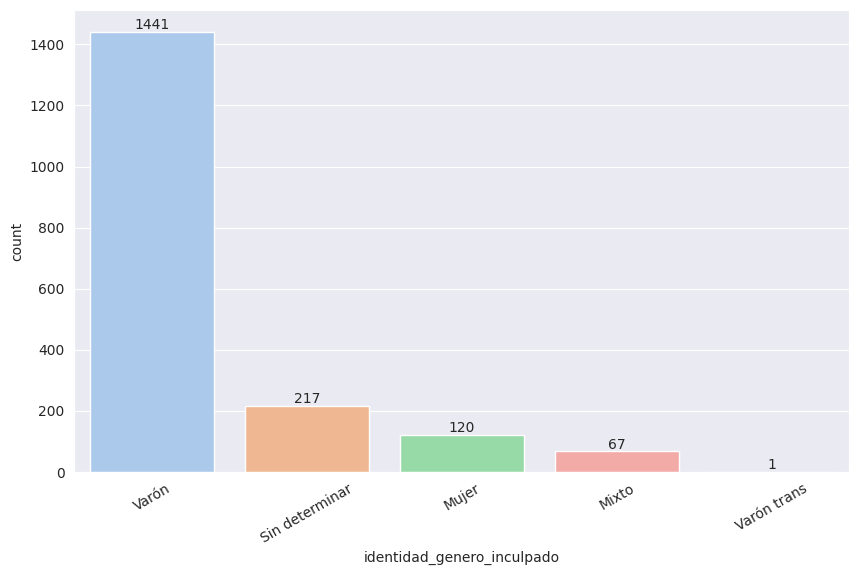

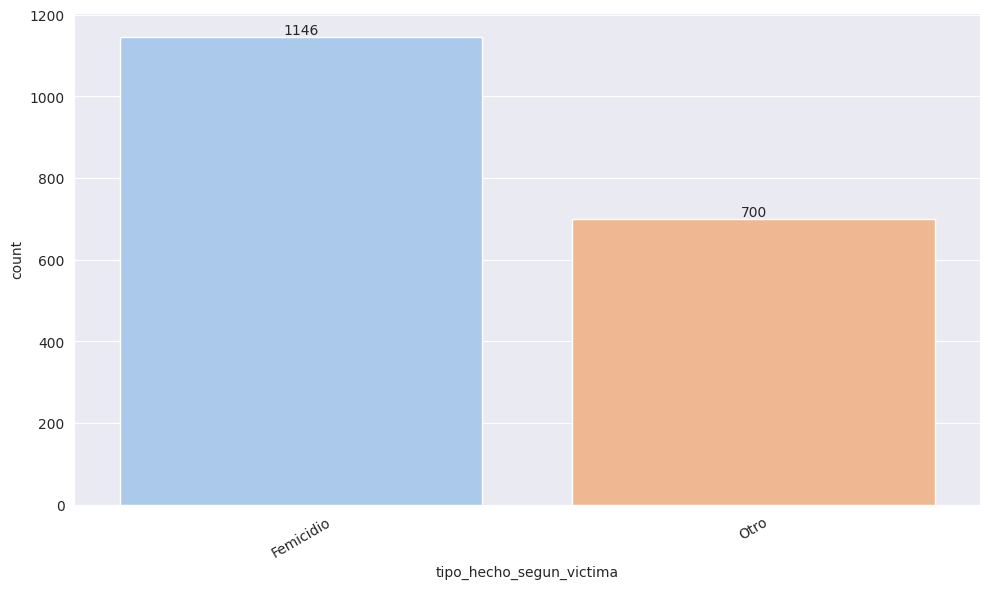

In [ ]:
for column in nuevo_df:
    if nuevo_df[column].dtype == 'O' and column != 'departamento' and column != 'provincia':

        # Hago un nuevo df con el recuento de cada variable y lo ordeno de forma descendente
        counts = nuevo_df[column].value_counts().reset_index()
        counts.columns = [column, 'count']
        counts = counts.sort_values('count', ascending=False)
        plt.figure(figsize=(10, 6))

        # Grafico añadiendo las etiquetas de valor
        color_palette = sns.color_palette('pastel')
        g = sns.barplot(x=column, y='count', palette=color_palette, data=counts)
        g.set_xticklabels(g.get_xticklabels(), rotation=30)

        for p in g.patches:
            g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## Codificación de variables

Realizamos la codificación de las variables categóricas. Para eso primero transformamos la variable target y luego utilizamos get_dummies.

In [ ]:
nuevo_df.head(10)

,Id_hecho,provincia,departamento,fecha_hecho,anio,mes,tipo_lugar,clase_arma,relacion_victima_inculpado,en_ocasion_otro_delito,cant_vic,identidad_genero_victima,cant_inc,identidad_genero_inculpado,tipo_hecho_segun_victima
8,11543,NEUQUEN,Confluencia,2017-03-11,2017,3,Domicilio particular,Arma de fuego,Pareja o Ex Pareja,No fue en ocasión de otro delito,1,Mujer,1,Varón,Femicidio
10,11545,NEUQUEN,Collón Curá,2017-06-08,2017,6,Domicilio particular,Arma de fuego,Familiar,No fue en ocasión de otro delito,1,Mujer,1,Varón,Femicidio
14,11567,NEUQUEN,Aluminé,2017-04-22,2017,4,Domicilio particular,Ahorcamiento / asfixia,Familiar,No fue en ocasión de otro delito,1,Mujer,1,Mujer,Otro
17,11570,SALTA,Capital,2017-01-05,2017,1,Carcel o comisaría,Arma blanca,Pareja o Ex Pareja,No fue en ocasión de otro delito,1,Mujer,1,Varón,Femicidio
18,11571,SALTA,Grl. José de San Martín,2017-01-06,2017,1,Vía pública,Ahorcamiento / asfixia,Pareja o Ex Pareja,No fue en ocasión de otro delito,1,Mujer,1,Varón,Femicidio
23,11576,SALTA,Capital,2017-01-21,2017,1,Domicilio particular,Quemaduras,Pareja o Ex Pareja,No fue en ocasión de otro delito,1,Mujer,1,Varón,Femicidio
26,11579,SALTA,La Caldera,2017-01-27,2017,1,Domicilio particular,Arma blanca,Sin determinación,No fue en ocasión de otro delito,1,Mujer,1,Sin determinar,Femicidio
33,11588,NEUQUEN,Lácar,2017-06-12,2017,6,Domicilio particular,Arma blanca,Pareja o Ex Pareja,No fue en ocasión de otro delito,1,Mujer,1,Varón,Femicidio
34,11589,CHUBUT,Rawson,2017-04-29,2017,4,Vía pública,Arma de fuego,Sin relación,No fue en ocasión de otro delito,1,Mujer,1,Mujer,Otro
42,11597,SANTA FE,San Lorenzo,2017-01-25,2017,1,Domicilio particular,Golpes,Sin determinación,Sí Robo,1,Mujer,1,Sin determinar,Otro


A partir del análisis exploratorio de los datos seleccionamos las siguientes variables de interés:

'relacion_victima_inculpado'

'en_ocasion_otro_delito'

'tipo_lugar'

'clase_arma'

'cant_vic'

'identidad_genero_victima'

'cant_inc'

'identidad_genero_inculpado'

'tipo_hecho_segun_victima'

In [ ]:
data0 = nuevo_df [['relacion_victima_inculpado', 'en_ocasion_otro_delito', 'tipo_lugar', 'clase_arma', 'cant_vic',
                   'identidad_genero_victima', 'cant_inc', 'identidad_genero_inculpado', 'tipo_hecho_segun_victima']]

In [ ]:
data1 = data0.copy()

In [ ]:
# Reemplazamos los valores "Femicidio" por 1 y "Otro" por 0.
data1.tipo_hecho_segun_victima = data1.tipo_hecho_segun_victima.replace({'Femicidio':1, 'Otro':0})

In [ ]:
# Realizamos una codificación one-hot para las variables categóricas
data1 = pd.get_dummies(data1)

In [ ]:
data1.shape

(1846, 35)

In [ ]:
data1.head(2)

,cant_vic,cant_inc,tipo_hecho_segun_victima,relacion_victima_inculpado_Familiar,relacion_victima_inculpado_Otras rel. no familiares,relacion_victima_inculpado_Pareja o Ex Pareja,relacion_victima_inculpado_Sin determinación,relacion_victima_inculpado_Sin relación,en_ocasion_otro_delito_No fue en ocasión de otro delito,en_ocasion_otro_delito_Si Otro Delito,en_ocasion_otro_delito_Sin determinación,en_ocasion_otro_delito_Sí Robo,en_ocasion_otro_delito_Sí abuso sexual con acceso carnal (violación),tipo_lugar_Carcel o comisaría,tipo_lugar_Comercio,tipo_lugar_Domicilio particular,tipo_lugar_Interior de rodados,tipo_lugar_Otro lugar,tipo_lugar_Sin determinar,tipo_lugar_Vía pública,clase_arma_Ahorcamiento / asfixia,clase_arma_Arma blanca,clase_arma_Arma de fuego,clase_arma_Golpes,clase_arma_Objeto contundente,clase_arma_Otra,clase_arma_Quemaduras,clase_arma_Sin determinación,identidad_genero_victima_Mixto,identidad_genero_victima_Mujer,identidad_genero_inculpado_Mixto,identidad_genero_inculpado_Mujer,identidad_genero_inculpado_Sin determinar,identidad_genero_inculpado_Varón,identidad_genero_inculpado_Varón trans
8,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
10,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


# Random Forest

A continuación utilizamos el modelo Random Forest como modelo predictivo para la clasificación de los homicidios dolosos de mujeres.

In [ ]:
data1.head()

,cant_vic,cant_inc,tipo_hecho_segun_victima,relacion_victima_inculpado_Familiar,relacion_victima_inculpado_Otras rel. no familiares,relacion_victima_inculpado_Pareja o Ex Pareja,relacion_victima_inculpado_Sin determinación,relacion_victima_inculpado_Sin relación,en_ocasion_otro_delito_No fue en ocasión de otro delito,en_ocasion_otro_delito_Si Otro Delito,en_ocasion_otro_delito_Sin determinación,en_ocasion_otro_delito_Sí Robo,en_ocasion_otro_delito_Sí abuso sexual con acceso carnal (violación),tipo_lugar_Carcel o comisaría,tipo_lugar_Comercio,tipo_lugar_Domicilio particular,tipo_lugar_Interior de rodados,tipo_lugar_Otro lugar,tipo_lugar_Sin determinar,tipo_lugar_Vía pública,clase_arma_Ahorcamiento / asfixia,clase_arma_Arma blanca,clase_arma_Arma de fuego,clase_arma_Golpes,clase_arma_Objeto contundente,clase_arma_Otra,clase_arma_Quemaduras,clase_arma_Sin determinación,identidad_genero_victima_Mixto,identidad_genero_victima_Mujer,identidad_genero_inculpado_Mixto,identidad_genero_inculpado_Mujer,identidad_genero_inculpado_Sin determinar,identidad_genero_inculpado_Varón,identidad_genero_inculpado_Varón trans
8,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
10,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
14,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
17,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
18,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Eliminamos la columna 'tipo_hecho_segun_victima' del df y le asignamos el resultado a la variable "X"
X2 = data1.drop (columns='tipo_hecho_segun_victima')

# Asignamos la columna 'tipo_hecho_segun_victima' del df a la variable "y"
y2 = data1.tipo_hecho_segun_victima

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(max_depth=7, n_estimators=100, criterion="gini", random_state=42)
clf2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=7, random_state=42)

In [ ]:
# Obtenemos las predicciones
y_pred2= clf2.predict(X_test2)

<Figure size 1000x600 with 0 Axes>

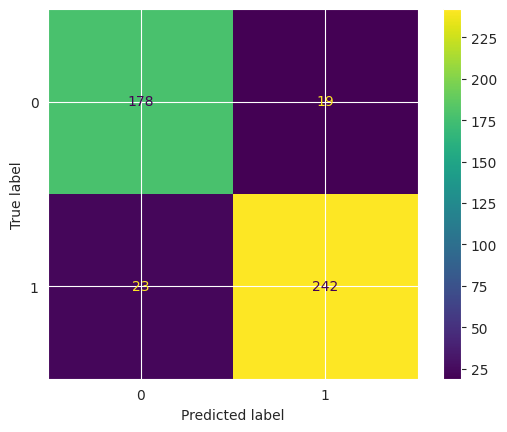

In [ ]:
plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(clf2, X_test2, y_test2) # matriz de confusion sobre los datos del conjunto de prueba
plt.show()

Es posible observar que el modelo tiene accuracy del 91%. En general, los resultados indican que el clasificador tiene un buen rendimiento para ambas clases, con una precisión y un recall altos. El F1-score también es alto, lo que sugiere un equilibrio adecuado entre la precisión y el recall. Podría ser más adecuado quedarnos con este modelo ya que es un poco más sensible a la detección de femicidios que el modelo creado con Decision Tree Classifier.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred2, y_true= y_test2))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       197
           1       0.93      0.91      0.92       265

    accuracy                           0.91       462
   macro avg       0.91      0.91      0.91       462
weighted avg       0.91      0.91      0.91       462



## Cross Validation: LOOCV






In [ ]:
# Eliminamos la columna 'tipo_hecho_segun_victima' del df y le asignamos el resultado a la variable "Xcv2"
Xcv2 = data1.drop (columns='tipo_hecho_segun_victima')

# Asignamos la columna 'tipo_hecho_segun_victima' del df a la variable "ycv2"
ycv2 = data1.tipo_hecho_segun_victima

In [ ]:
cv = LeaveOneOut()

In [ ]:
model2 = RandomForestClassifier(random_state=42, n_estimators=100, criterion="gini", max_depth=7)

In [ ]:
scores2 = cross_val_score(model2, Xcv2, ycv2, scoring='accuracy', cv=cv, verbose=1)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   39.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:  2.5min
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:  4.0min
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  5.8min


In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

Accuracy: 0.924 (0.266)


A partir del método de Cross Validation es posible observar que el Accuracy del modelo asciende a 92%. Es decir, que es posible certificar con mayor seguridad el buen desempeño del modelo.

## Optimización del modelo: Hypertuning con GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_grid = {
        'n_estimators': [30, 100, 200],
        'max_depth': [5,7,10],
        'criterion': ['gini', 'entropy'],
        }

In [ ]:
%%time
grid_cv = GridSearchCV(clf2, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train2, y_train2)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test2, grid_cv.predict(X_test2)), 5)}')

Mejores Parametros {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
Mejor CV score 0.9197913438694351
Accuracy del modelo = 0.92857
CPU times: user 757 ms, sys: 74.7 ms, total: 831 ms
Wall time: 13.5 s


Los resultados del hypertuning realizado muestran que los mejores parámetros a utilizar son:

*   max_depth: 10
*   n_estimators: 200
*   criterion: entropy



En función de las métricas obtenidas es posible decir que el modelo construido a partir del Random Forest tiene un buen desempeño, con un accuracy del 91% y precisión y recall que oscilan entre 89% y 93%. El modelo fue optimizado en sus parámetros, lo cual permitió mejorar aún más las métricas, tal como se muestra a continuación.

In [ ]:
mejor_modelo = RandomForestClassifier(max_depth=10, n_estimators=200, criterion="entropy", random_state=42)

In [ ]:
mejor_modelo.fit(X_train2, y_train2)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

<Figure size 1000x600 with 0 Axes>

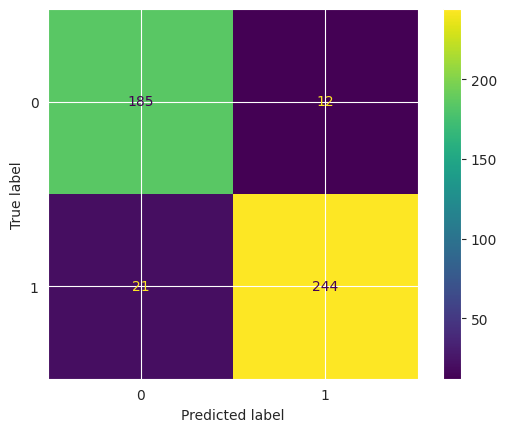

In [ ]:
plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(mejor_modelo, X_test2, y_test2)
plt.show()

In [ ]:
y_predF= mejor_modelo.predict(X_test2)

In [ ]:
print(classification_report(y_pred=y_predF, y_true= y_test2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       197
           1       0.95      0.92      0.94       265

    accuracy                           0.93       462
   macro avg       0.93      0.93      0.93       462
weighted avg       0.93      0.93      0.93       462



Tal como muestran las métricas, la optimización de parámetros permitió elevar el accuracy a un 93%, así como la precision y el recall de ambas clases.

# Conclusiones

A partir del análisis exploratorio de los datos presentados fue posible obtener algunas características centrales de los femicidios. Particularmente, el análisis mostró que en la clasificación de los femicidios son determinantes algunas variables tales como el género de las víctimas y la cantidad, el género de los imputados y la cantidad, el vínculo entre las víctimas y los imputados, el lugar del hecho y la concurrencia con otros delitos.

Estas variables fueron utilizadas para construir un modelo que clasifica los homicidios dolosos dolosos de mujeres, distinguiendo entre los femicidios de aquellos que no lo son. El modelo evidenció tener un buen desempeño, especialmente en el caso de la predicción de femicidios.

Este análisis facilita la construcción de estadística sobre femicidios y resulta de utilidad no solo para los/as efectores de políticas públicas, sino también para el público general interesado en el tema. El trabajo presentado brinda información relevante sobre esta poblemática pública, contribuyendo a la elaboración de políticas de prevención de estos crímenes.



